In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf
import skimage.io as io
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [3]:
from keras.layers import Lambda, LeakyReLU, Reshape, Add, Cropping2D, Conv2DTranspose, Permute, Conv2D, MaxPooling2D, Activation
from keras.models import Sequential


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
from keras.callbacks import Callback
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten
from keras.preprocessing import text, sequence
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [5]:
from keras import backend as K


In [23]:
#Train Images Rescaling
from skimage.transform import rescale
from skimage import img_as_uint
import skimage.io as io
import skimage.transform as trans
n = 25

for i in range(0, n):
    path = str(i)+'.tif'
    img = io.imread('train/image/'+path)
    img_resized = rescale(img, (0.835,0.917), anti_aliasing=False)
#    print(img_resized.shape)
    img_resized = img_as_uint(img_resized)
    path = str(i)+'.tif'
    io.imsave('train/image_processed/'+path, img_resized)

C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/image_processed/0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:1

In [24]:
for i in range(0, n):
    path = str(i)+'.tif'
    img = io.imread('train/label/'+path)
    img_resized = rescale(img, (0.835,0.917), anti_aliasing=False)

    img_resized = img_as_uint(img_resized)
    path = str(i)+'.tif'
    io.imsave('train/label_processed/'+path, img_resized)

C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/label_processed/0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\external\tifffile\tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/label_processed/1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/label_processed/2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/label_processed/3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: train/label_processed/4.

In [25]:
#Test Images Rescaling
n = 10
for i in range(0, n):
    path = str(i)+'.tif'
    img = io.imread('test/image/'+path)
    img_resized = rescale(img, (0.83479,0.9172), anti_aliasing=False)

    img_resized = img_as_uint(img_resized)
    path = str(i)+'.tif'
    io.imsave('test/image_processed/'+path, img_resized)

C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\semal\Anaconda3.3\lib\site-packages\skimage\io\_io.py:140: UserWarning: test/image_processed/5.tif is a lo

In [8]:
def vgg_model (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    
    c100 = Conv2D(64, (3, 3),activation='elu', kernel_initializer='he_normal', name='conv1_1', padding='same') (inputs)
    c1 = Conv2D(64, (3, 3),activation='elu', kernel_initializer='he_normal',name='conv1_2', padding='same') (c100)
    p1 = MaxPooling2D((2, 2),strides=(2,2)) (c1)

    c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2),strides=(2,2)) (c2)

    c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    c3 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)

    p3 = MaxPooling2D((2, 2),strides=(2,2)) (c3)

    c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    c4 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)

    p4 = MaxPooling2D(pool_size=(2, 2),strides=(2,2)) (c4)

    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
  #  c5 = Dropout(0.3) (c5)
    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)
    c5 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    p5 = MaxPooling2D(pool_size=(2, 2),strides=(2,2)) (c5)

    u6 = Conv2D(4096, (3, 3), strides=(3, 3), padding='same') (c5)
   # u6 = concatenate([u6, c4])
    c6 = Conv2D(4096, (1, 1), strides=(1, 1), padding='same') (u6)
 #   c6 = Dropout(0.2) (c6)
 #   c6 = Conv2D(512, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    c7=Conv2D(1, kernel_size=(1, 1), padding='same', activation='relu', name='score_fr')(c6)
    c8=LeakyReLU()(Conv2D(1, kernel_size=(4,4), padding='same', name='score14')(c7))
    c9=(Cropping2D(cropping=((0, 2), (0, 2))))(c8)
    
    skip1=Add()([c9, inputs])

    c99=LeakyReLU()(Conv2D(1, kernel_size=(8,8), padding='same', name='score14')(skip1))
    c10=Cropping2D(cropping=((2, 2), (2, 2)))(c99)
    c10=LeakyReLU()(Conv2D(1, kernel_size=(8,8), padding='same', name='score14')(c10))
    c10=Cropping2D(cropping=((2, 2), (2, 2)))(c10)

    
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c10)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(lr = 1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [9]:
def trainGenerator(batch_size, train_path, img_folder, mask_folder, aug_dict, color_mode = 'grayscale', 
                   mask_color_mode = 'grayscale', target_size = (576,576), seed = 1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(train_path, classes = [img_folder], class_mode = None,
                                                        color_mode = color_mode, target_size = target_size, 
                                                        batch_size = batch_size, seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(train_path, classes = [mask_folder], class_mode = None,
                                                      color_mode = mask_color_mode, target_size = target_size,
                                                      batch_size = batch_size, seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask)
        yield (img,mask)
        
        
def adjustData(img,mask):
    if(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)


def testGenerator(test_path,num_image,target_size = (576,576),as_gray = True):
    for i in range(0, num_image):
        img = io.imread(os.path.join(test_path,"%d.tif"%i),as_gray = as_gray)
        img = img / 255
        img = np.reshape(img,img.shape+(1,))
        img = np.reshape(img,(1,)+img.shape)
        yield img
    

In [10]:
data_gen_args = dict(rotation_range=0.2, width_shift_range=0.05, height_shift_range=0.05, shear_range=0.05,
                     zoom_range=0.05, horizontal_flip=True, fill_mode='nearest')

myGene = trainGenerator(5,'train','image_processed','label_processed',data_gen_args)
model = vgg_model(576,576,1)
model.fit_generator(myGene,steps_per_epoch=5,epochs=1,callbacks=None)
model.save('vgg_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 576, 576, 1)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 576, 576, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 576, 576, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 576, 576, 64) 73792       concatenate_4[0][0]              
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 576, 576, 64) 0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 576, 576, 64) 36928       dropout_5[0][0]                  
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 576, 576, 1)  65          conv2d_18[0][0]                  
Total params: 33,980,481
Trainable params: 33,980,481
Non-trainable params: 0
__________________________________________________________________________________________________
Instructions for updating:
Use 

In [11]:
model = load_model('vgg_model.h5')

In [12]:
testGene = testGenerator("test/image_processed/", 10)
results = model.predict_generator(testGene,10,verbose=1)

10/10 [==============================] - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 48s - ETA: 35 - ETA: 22 - ETA: 11 - 111s 11s/step


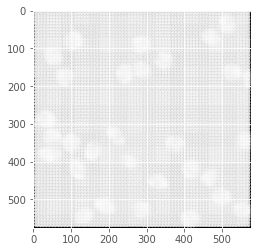

In [24]:
plt.imshow(np.squeeze(results[1]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

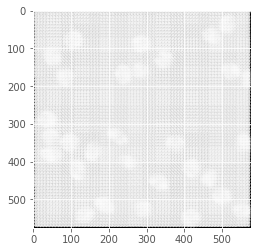

In [25]:
plt.imshow(np.squeeze(results[0]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

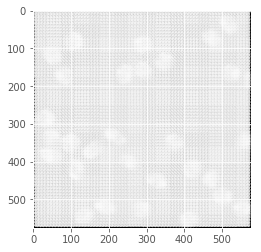

In [26]:
plt.imshow(np.squeeze(results[2]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

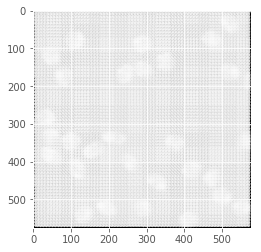

In [27]:
plt.imshow(np.squeeze(results[3]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

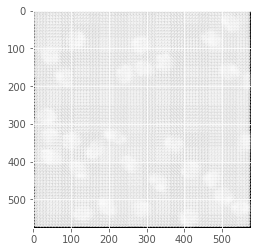

In [28]:
plt.imshow(np.squeeze(results[4]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

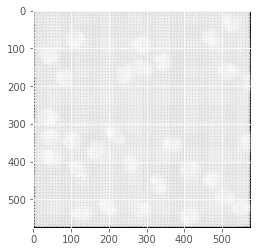

In [29]:
plt.imshow(np.squeeze(results[5]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

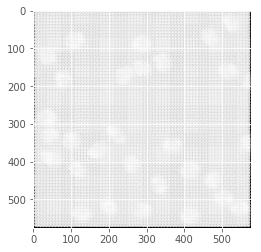

In [30]:
plt.imshow(np.squeeze(results[6]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

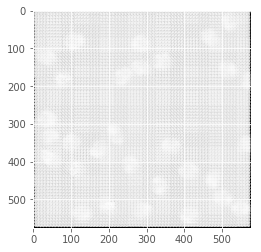

In [31]:
plt.imshow(np.squeeze(results[7]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

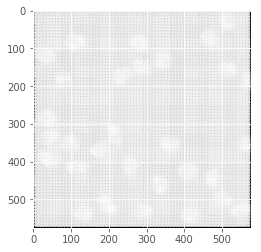

In [32]:
plt.imshow(np.squeeze(results[8]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

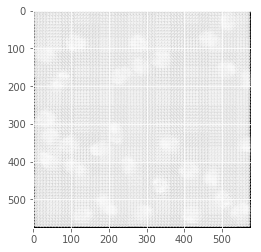

In [33]:
plt.imshow(np.squeeze(results[9]), cmap='Greys', vmin = 0.0, vmax = 0.09)
plt.show()

[[ 91.23645   66.70996   50.11491  ...  59.456734  57.123848  80.75159 ]
 [ 46.08051   51.088     35.860863 ...  26.056295  61.274708  68.06473 ]
 [ 53.80896   76.4822    18.603802 ...  15.466188  46.44559   46.303898]
 ...
 [ 55.861546  31.705765  25.277649 ...  27.868996  25.988287  64.66309 ]
 [ 94.32471   95.58902   53.452484 ...  40.607426  52.619453  63.60935 ]
 [ 83.771965 101.4226    67.678535 ...  57.203598  56.787254  71.90616 ]]


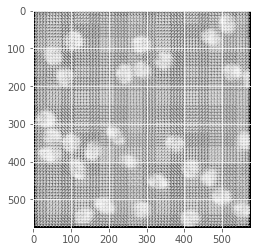

In [35]:
results_ = np.squeeze(np.multiply(results[1],255))
print (results_)
plt.imshow(results_ , cmap='Greys', vmin = 0, vmax = 9)
plt.show()